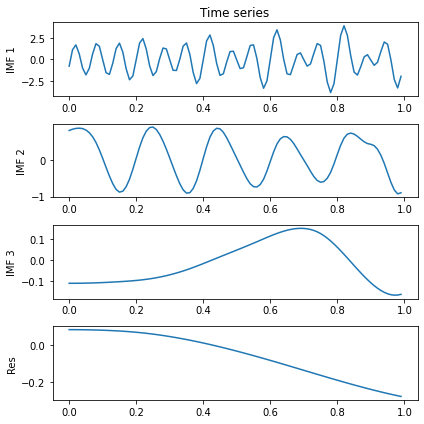

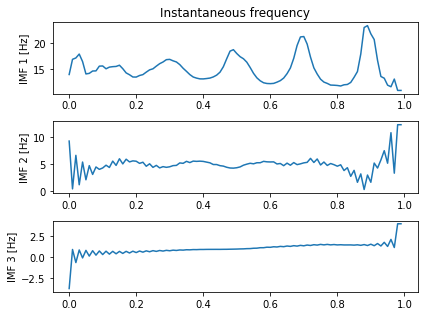

In [2]:
#Example
import numpy as np
from PyEMD import EMD, Visualisation

#generate the signal
#一维数据
t = np.arange(0,1, 0.01)
S = 2*np.sin(2*np.pi*15*t) +4*np.sin(2*np.pi*10*t)*np.sin(2*np.pi*t*0.1)+np.sin(2*np.pi*5*t)


# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(S)
imfs, res = emd.get_imfs_and_residue()

# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]

#Draw diagrams
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)

# 绘制并显示所有提供的IMF的瞬时频率
vis.plot_instant_freq(t, imfs=imfs)
vis.show()


<Figure size 432x288 with 0 Axes>

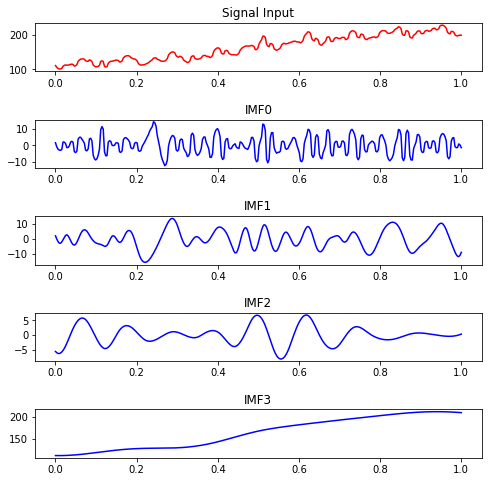

<Figure size 432x288 with 0 Axes>

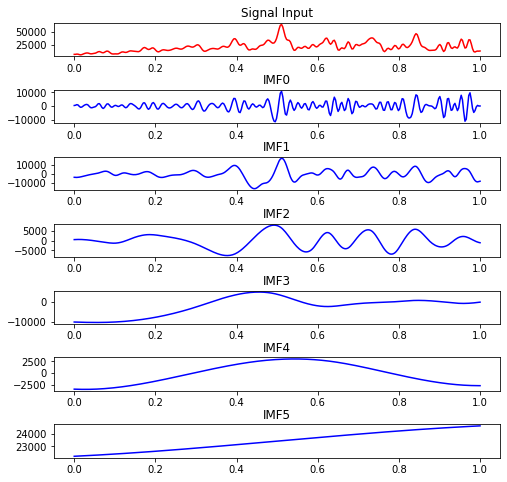

<Figure size 432x288 with 0 Axes>

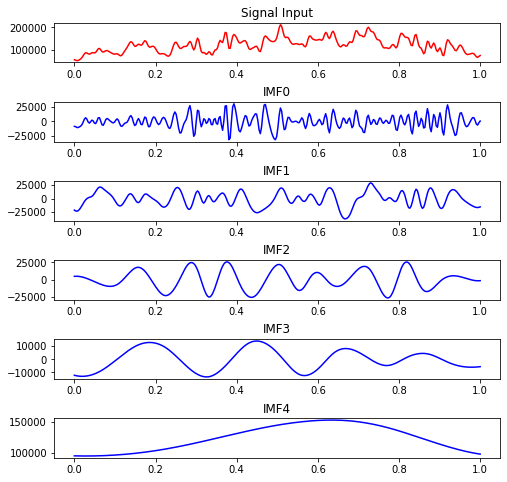

<Figure size 432x288 with 0 Axes>

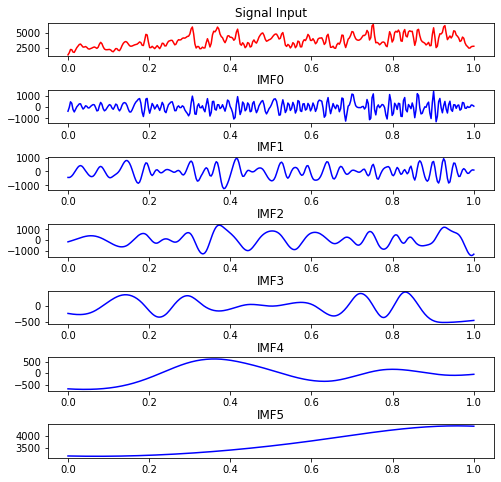

<Figure size 432x288 with 0 Axes>

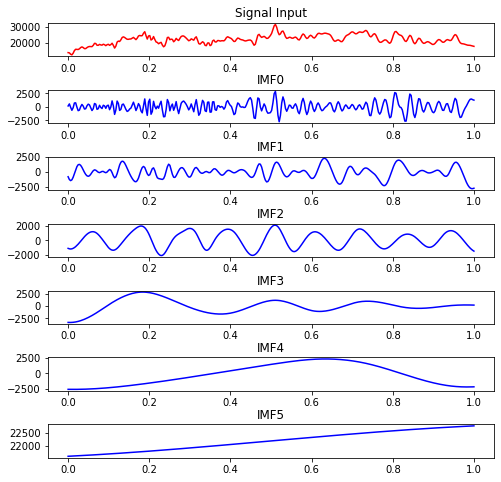

<Figure size 432x288 with 0 Axes>

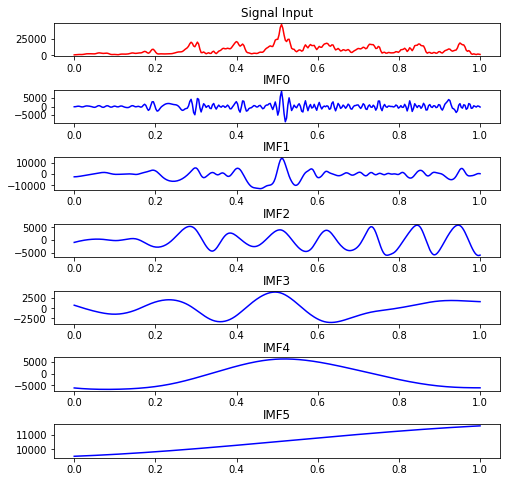

In [1]:
#emd decomposition
import pandas as pd
from pandas import read_csv
import numpy as np
from PyEMD import CEEMDAN
from PyEMD import EMD
from PyEMD import EEMD
from PyEMD import Visualisation
import os
import random
import matplotlib.pyplot as plt
import sys

def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功")
    
#1. load dataset
dataframe = read_csv('C:/Users/Administrator/Desktop/XI-2/data/try2ed/PD.csv', engine='python')
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')
#data = data.reshape(-1)
#X= dataset[:,0]
#X=X.reshape(-1)
#print(X)


if __name__ == "__main__":
    X = []
    for k in range(6):
        X= dataset[:,k]
        X=X.reshape(-1)
        emd = EMD()
        imfs_emd = emd(X)
        x = np.linspace(0,1,len(X))
        
        #Draw diagrams
        plt.figure(1)
        plt.figure(figsize=(8,8))
        plt.subplot(1 + np.shape(imfs_emd)[0], 1, 1 )
        plt.subplots_adjust(wspace=1,hspace=1)
        plt.plot(x, X, 'r')
        plt.title("Signal Input")

        for i in range(np.shape(imfs_emd)[0]):
            plt.subplot(1 + np.shape(imfs_emd)[0],1,2 + i)
            plt.plot(x, imfs_emd[i, :], 'b')
            plt.title("IMF" + str(i))
        tupianming1="C:/Users/Administrator/Desktop/XI-2/data/EMD族算法分解结果/emd"+str(k)+".png"
        plt.savefig(tupianming1)#保存图片
        plt.show()

        # 绘制并显示所有提供的IMF的瞬时频率
        #vis.plot_instant_freq(t, imfs=imfs)
        #vis.show()
        
        wenjianming1="C:/Users/Administrator/Desktop/XI-2/data/EMD族算法分解结果/emd"+str(k)+".csv"
        imfs_emd=imfs_emd.T
        imfs_emd=pd.DataFrame(imfs_emd)
        imfs_emd.to_csv(wenjianming1, header=False)
        
        

<Figure size 432x288 with 0 Axes>

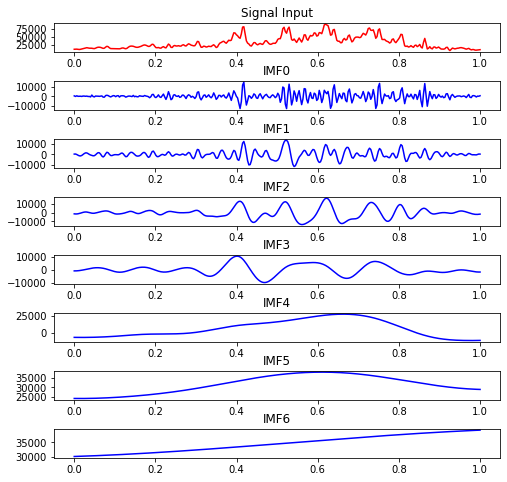

<Figure size 432x288 with 0 Axes>

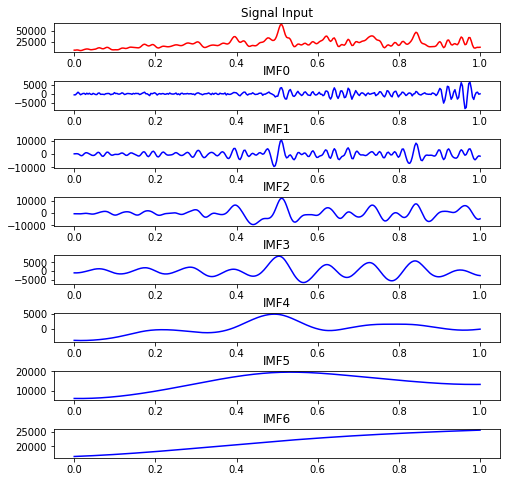

<Figure size 432x288 with 0 Axes>

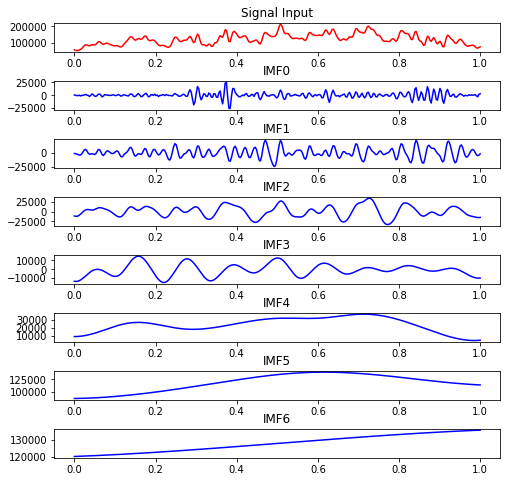

<Figure size 432x288 with 0 Axes>

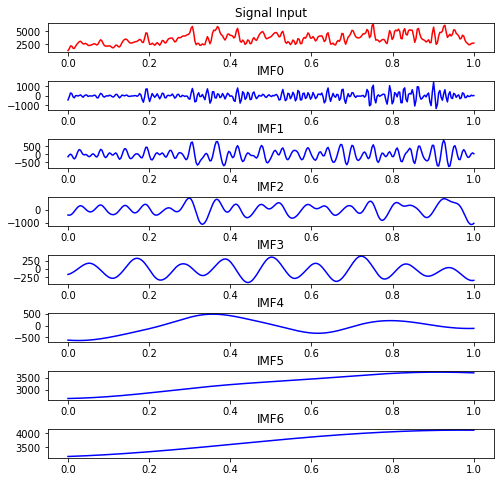

<Figure size 432x288 with 0 Axes>

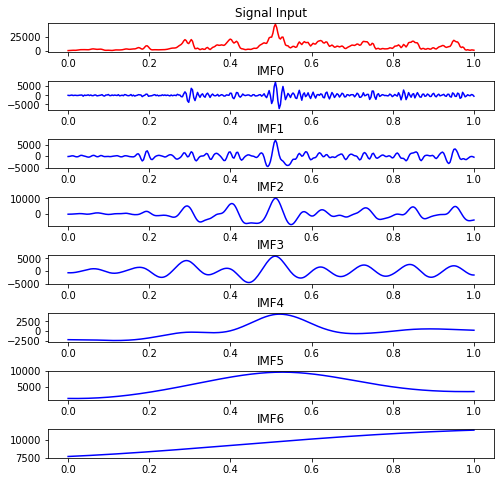

<Figure size 432x288 with 0 Axes>

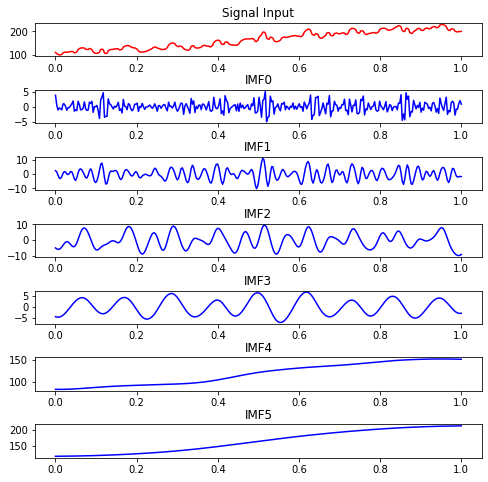

In [22]:
#eemd decomposition  重构太麻烦且大量文献证明其效果不如CEEMDAN
import pandas as pd
from pandas import read_csv
import numpy as np
from PyEMD import CEEMDAN
from PyEMD import EMD
from PyEMD import EEMD
from PyEMD import Visualisation
import os
import random
import matplotlib.pyplot as plt
import sys

def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功")
    
#1. load dataset
dataframe = read_csv('C:/Users/Administrator/Desktop/XI-2/data/PD.csv', engine='python')
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')
#data = data.reshape(-1)
#X= dataset[:,0]
#X=X.reshape(-1)
#print(X)


if __name__ == "__main__":
    X = []
    for k in range(6):
        X= dataset[:,k]
        X=X.reshape(-1)
        eemd = EEMD()
        imfs_eemd = eemd(X)
        x = np.linspace(0,1,len(X))
        
        #Draw diagrams
        plt.figure(2)
        plt.figure(figsize=(8,8))
        plt.subplot(1 + np.shape(imfs_eemd)[0], 1, 1 )
        plt.subplots_adjust(wspace=1,hspace=1)
        plt.plot(x, X, 'r')
        plt.title("Signal Input")

        for i in range(np.shape(imfs_eemd)[0]):
            plt.subplot(1 + np.shape(imfs_eemd)[0],1,2 + i)
            plt.plot(x, imfs_eemd[i, :], 'b')
            plt.title("IMF" + str(i))
        tupianming2="C:/Users/Administrator/Desktop/XI-2/data/eemd"+str(k)+".png"
        plt.savefig(tupianming2)#保存图片
        plt.show()

        # 绘制并显示所有提供的IMF的瞬时频率
        #vis.plot_instant_freq(t, imfs=imfs)
        #vis.show()
        
        wenjianming2="C:/Users/Administrator/Desktop/XI-2/data/eemd"+str(k)+".csv"
        imfs_eemd=imfs_eemd.T
        imfs_eemd=pd.DataFrame(imfs_eemd)
        imfs_eemd.to_csv(wenjianming2, header=False)
        
        

<Figure size 432x288 with 0 Axes>

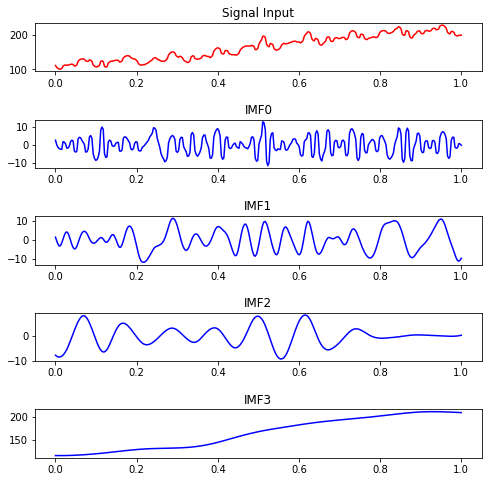

<Figure size 432x288 with 0 Axes>

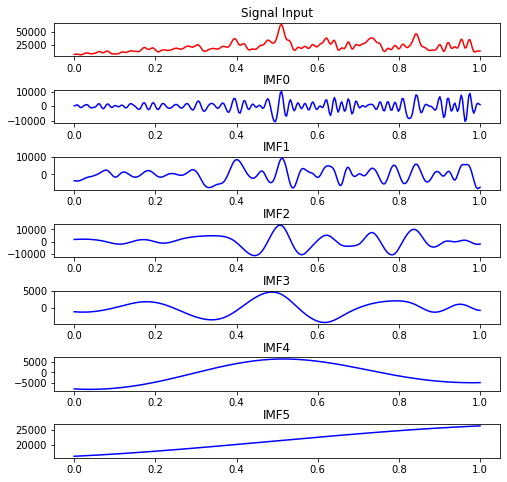

<Figure size 432x288 with 0 Axes>

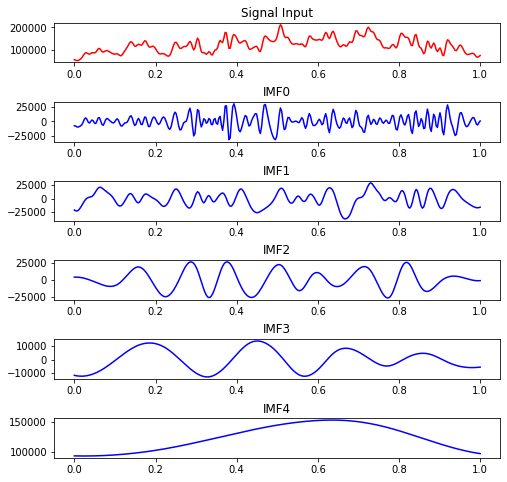

<Figure size 432x288 with 0 Axes>

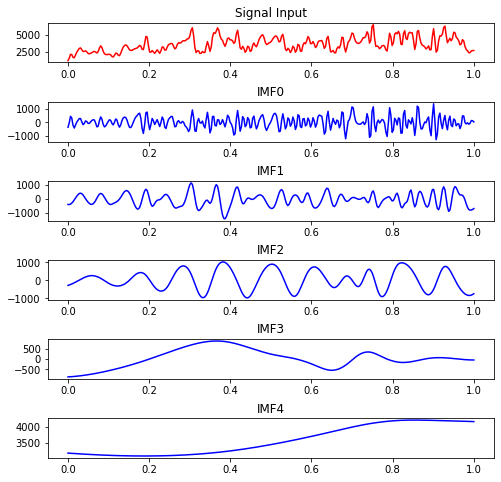

<Figure size 432x288 with 0 Axes>

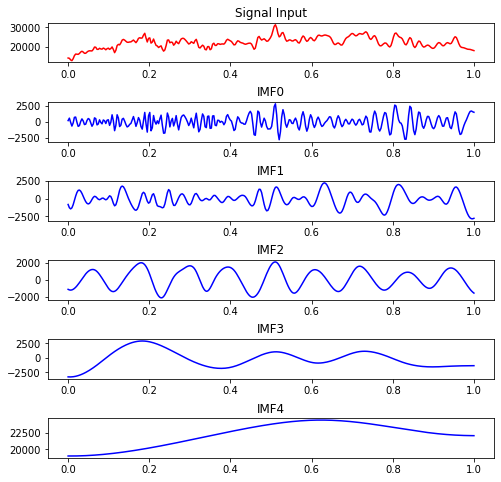

<Figure size 432x288 with 0 Axes>

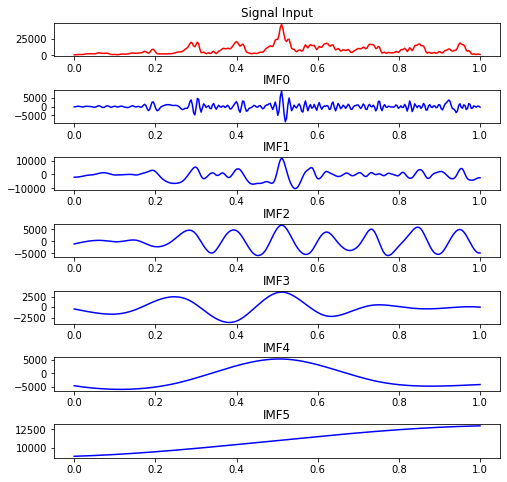

In [2]:
#ceemdan decomposition
import pandas as pd
from pandas import read_csv
import numpy as np
from PyEMD import CEEMDAN
from PyEMD import EMD
from PyEMD import EEMD
from PyEMD import Visualisation
import os
import random
import matplotlib.pyplot as plt
import sys

def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功")
    
#1. load dataset
dataframe = read_csv('C:/Users/Administrator/Desktop/XI-2/data/try2ed/PD.csv', engine='python')
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')
#data = data.reshape(-1)
#X= dataset[:,0]
#X=X.reshape(-1)
#print(X)


if __name__ == "__main__":
    X = []
    for k in range(6):
        X= dataset[:,k]
        X=X.reshape(-1)
        ceemdan = CEEMDAN()
        imfs_ceemd = ceemdan(X)
        x = np.linspace(0,1,len(X))
        
        #Draw diagrams
        plt.figure(3)
        plt.figure(figsize=(8,8))
        plt.subplot(1 + np.shape(imfs_ceemd)[0], 1, 1 )
        plt.subplots_adjust(wspace=1,hspace=1)
        plt.plot(x, X, 'r')
        plt.title("Signal Input")

        for i in range(np.shape(imfs_ceemd)[0]):
            plt.subplot(1 + np.shape(imfs_ceemd)[0],1,2 + i)
            plt.plot(x, imfs_ceemd[i, :], 'b')
            plt.title("IMF" + str(i))
        tupianming3="C:/Users/Administrator/Desktop/XI-2/data/EMD族算法分解结果/ceemdan"+str(k)+".png"
        plt.savefig(tupianming3)#保存图片
        plt.show()

        # 绘制并显示所有提供的IMF的瞬时频率
        #vis.plot_instant_freq(t, imfs=imfs)
        #vis.show()
        
        wenjianming3="C:/Users/Administrator/Desktop/XI-2/data/EMD族算法分解结果/ceemdan"+str(k)+".csv"
        imfs_ceemd=imfs_ceemd.T
        imfs_ceemd=pd.DataFrame(imfs_ceemd)
        imfs_ceemd.to_csv(wenjianming3, header=False)
        
        

In [ ]:
#源码
if __name__ == "__main__":
 #   emd = EMD()
 #   eemd = EEMD()
    ceemdan = CEEMDAN()
 #   imfs_emd = emd(data)
  #  imfs_eemd = eemd(data)
    imfs_ceemd = ceemdan(data)
    x = np.linspace(0,1,len(data))

 #   plt.figure(1)
  #  plt.subplot(1 + np.shape(imfs_emd)[0], 1, 1 )
  #  plt.plot(x, data_list, 'r')
  #  plt.title("Signal Input")
 #   for i in range(np.shape(imfs_emd)[0]):
 #       plt.subplot(1 + np.shape(imfs_emd)[0],1,2+i)
 #       plt.plot(x,imfs_emd[i,:],'b')
 #       plt.title("IMF-emd"+str(i))
   # plt.show()


 #   plt.figure(2)
 #   plt.subplot(1 + np.shape(imfs_eemd)[0], 1, 1 )
 #   plt.plot(x, data_list, 'r')
 #   plt.title("Signal Input")
 #   for i in range(np.shape(imfs_eemd)[0]):
 #       plt.subplot(1 + np.shape(imfs_eemd)[0],1,2 + i)
 #       plt.plot(x, imfs_eemd[i, :], 'b')
 #       plt.title("IMF-eemd" + str(i))
   # plt.show()

    plt.figure(3)
    plt.subplot(1 + np.shape(imfs_ceemd)[0], 1, 1 )
    plt.plot(x, data, 'r')
    plt.title("Signal Input")

    for i in range(np.shape(imfs_ceemd)[0]):
        plt.subplot(1 + np.shape(imfs_ceemd)[0],1,2 + i)
        plt.plot(x, imfs_ceemd[i, :], 'b')
        plt.title("IMF" + str(i))
    plt.savefig('E:/桌面/导出的图片.png')#保存图片
    plt.show()



In [ ]:
filename='E:/桌面/study/forecasting/1小论文/Data/上海浦东/Baiduindex/quzao_index6.txt'
for i in range(5):
    data=imfs_ceemd[i]
    text_save(filename, data)